In [1]:
import sys
sys.path = ['/mnt/c/Users/steve/dev/stats/ts2/code',
 '/mnt/c/Users/steve/dev/stats/ts2/mycode',
 '/usr/local/lib/python38.zip',
 '/usr/local/lib/python3.8',
 '/usr/local/lib/python3.8/lib-dynload',
 '',
 '/mnt/c/Users/steve/dev/envs/general/lib/python3.8/site-packages',
 '/mnt/c/Users/steve/dev/envs/general/lib/python3.8/site-packages/IPython/extensions',
 '/home/steve/.ipython']

In [2]:
sys.path

['/mnt/c/Users/steve/dev/stats/ts2/code',
 '/mnt/c/Users/steve/dev/stats/ts2/mycode',
 '/usr/local/lib/python38.zip',
 '/usr/local/lib/python3.8',
 '/usr/local/lib/python3.8/lib-dynload',
 '',
 '/mnt/c/Users/steve/dev/envs/general/lib/python3.8/site-packages',
 '/mnt/c/Users/steve/dev/envs/general/lib/python3.8/site-packages/IPython/extensions',
 '/home/steve/.ipython']

In [3]:
import nsfg
import thinkstats2 as ts
import thinkplot as tp

/mnt/c/Users/steve/dev/envs/general/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
pmf = ts.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [5]:
print(pmf.Prob(7))
print(pmf.Prob(2))
print(pmf[7])
print(pmf[2])

0
0.4
0
0.4


In [6]:
pmf.Total()

1.0

In [40]:
dct = '../code/2002FemResp.dct'
dat = '../code/2002FemResp.dat.gz'
resp = nsfg.ReadFemResp(dct_file=dct, dat_file=dat)
dct = '../code/2002FemPreg.dct'
dat = '../code/2002FemPreg.dat.gz'
preg = nsfg.ReadFemPreg(dct_file=dct, dat_file=dat)

In [41]:
live = preg[preg.outcome == 1]

In [43]:
first = live[live.birthord == 1]
other = live[live.birthord != 1]

In [44]:
pmf_first = ts.Pmf(first.prglngth)
pmf_other = ts.Pmf(other.prglngth)

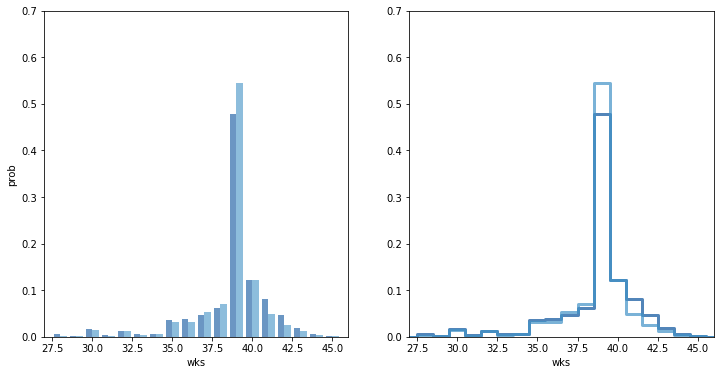

<Figure size 576x432 with 0 Axes>

In [49]:
w = .4
tp.PrePlot(2, cols=2)
tp.Hist(pmf_first, align='right', width=w)
tp.Hist(pmf_other, align='left', width=w)
tp.Config(xlabel='wks', ylabel='prob', axis=[27,46,0,0.7])
tp.PrePlot(2)
tp.SubPlot(2)
tp.Pmfs([pmf_first, pmf_other])
tp.Show(xlabel='wks', axis=[27,46,0,0.7])

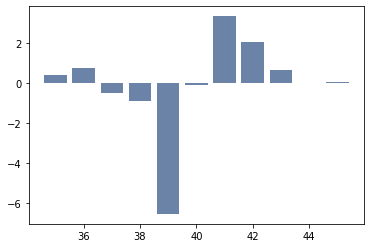

In [50]:
wks = range(35,46)
dif = []
for w in wks:
    p1 = pmf_first.Prob(w)
    p2 = pmf_other.Prob(w)
    d = 100 * (p1 - p2)
    dif.append(d)
tp.Bar(wks,dif)